In [1]:
import numpy as np
import control as ctrl
import matplotlib.pyplot as plt

In [2]:
J = 3.2284e-6 # moment of inertia of the rotor [kg.m²]
b = 3.5077e-6 # motor viscous friction constant [N.m.s]
# Ke    electromotive force constant       0.01 V/rad/sec
# Kt    motor torque constant              0.01 N.m/Amp
K = 0.0274
R = 4 # electric resistance [Ohm]
L = 2.75e-6 # electric inductance H

In [12]:
A = np.array([[0, 1, 0],
             [0, -b/J, K/J],
             [0, -K/L, -R/L]])

B = np.array([[0],
              [0],
              [1/L]])

#C = np.array([1, 0, 0])
C1 = np.array([1, 0, 0])
C2 = np.array([0, 1, 0])
C3 = np.array([0, 0, 1])

In [15]:
motor_ss_1 = ctrl.ss(A, B, C1, 0)

motor_ss_2 = ctrl.ss(A, B, C2, 0)

motor_ss_3 = ctrl.ss(A, B, C3, 0)

print(motor_ss_1, motor_ss_2, motor_ss_3)

<StateSpace>: sys[9]
Inputs (1): ['u[0]']
Outputs (1): ['y[0]']
States (3): ['x[0]', 'x[1]', 'x[2]']

A = [[ 0.00000000e+00  1.00000000e+00  0.00000000e+00]
     [ 0.00000000e+00 -1.08651344e+00  8.48717631e+03]
     [ 0.00000000e+00 -9.96363636e+03 -1.45454545e+06]]

B = [[     0.        ]
     [     0.        ]
     [363636.36363636]]

C = [[1. 0. 0.]]

D = [[0.]]
 <StateSpace>: sys[10]
Inputs (1): ['u[0]']
Outputs (1): ['y[0]']
States (3): ['x[0]', 'x[1]', 'x[2]']

A = [[ 0.00000000e+00  1.00000000e+00  0.00000000e+00]
     [ 0.00000000e+00 -1.08651344e+00  8.48717631e+03]
     [ 0.00000000e+00 -9.96363636e+03 -1.45454545e+06]]

B = [[     0.        ]
     [     0.        ]
     [363636.36363636]]

C = [[0. 1. 0.]]

D = [[0.]]
 <StateSpace>: sys[11]
Inputs (1): ['u[0]']
Outputs (1): ['y[0]']
States (3): ['x[0]', 'x[1]', 'x[2]']

A = [[ 0.00000000e+00  1.00000000e+00  0.00000000e+00]
     [ 0.00000000e+00 -1.08651344e+00  8.48717631e+03]
     [ 0.00000000e+00 -9.96363636e+03 -1.45454

In [5]:
print(np.linalg.eigvals(A))

[ 0.00000000e+00 -5.92260385e+01 -1.45448732e+06]


In [16]:
motor_tf_1 = ctrl.ss2tf(motor_ss_1)
motor_tf_1

TransferFunction(array([1.16415322e-09, 2.97904015e-04, 3.08624593e+09]), array([1.00000000e+00, 1.45454654e+06, 8.61435217e+07, 0.00000000e+00]))

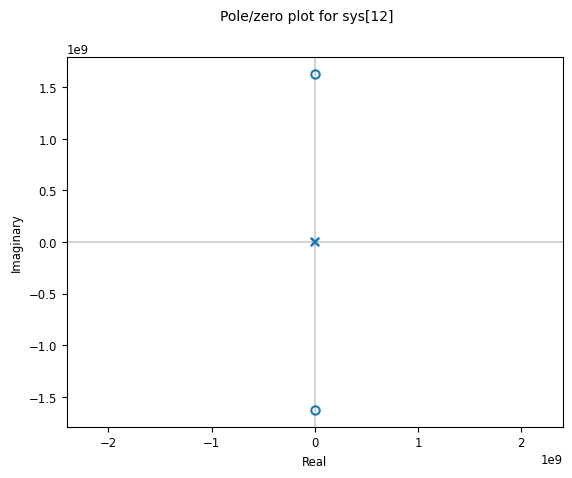

In [21]:
ctrl.pzmap(motor_tf_1)

In [22]:
ctrl.poles(motor_tf_1)

array([-1.45448732e+06+0.j, -5.92260385e+01+0.j,  0.00000000e+00+0.j])

In [17]:
motor_tf_2 = ctrl.ss2tf(motor_ss_2)
motor_tf_2

TransferFunction(array([2.32830644e-10, 3.08624593e+09, 0.00000000e+00]), array([1.00000000e+00, 1.45454654e+06, 8.61435217e+07, 0.00000000e+00]))

In [18]:
motor_tf_3 = ctrl.ss2tf(motor_ss_3)
motor_tf_3

TransferFunction(array([363636.36363636, 395095.79767685,      0.        ]), array([1.00000000e+00, 1.45454654e+06, 8.61435217e+07, 0.00000000e+00]))

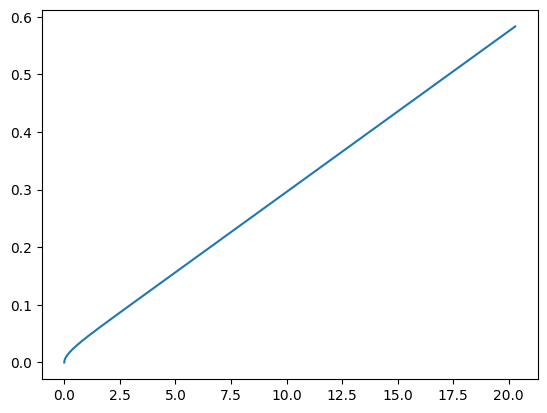

In [20]:
# Step response for the system
yout, T = ctrl.step_response(motor_ss_1)

plt.figure
plt.plot(T.T, yout.T)
plt.show(block=False)

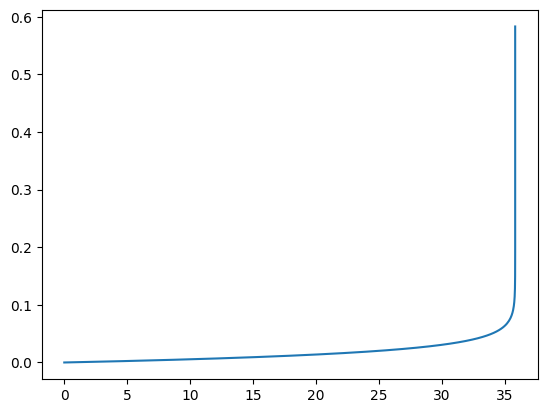

In [23]:
# Step response for the system
yout, T = ctrl.step_response(motor_ss_2)

plt.figure
plt.plot(T.T, yout.T)
plt.show(block=False)

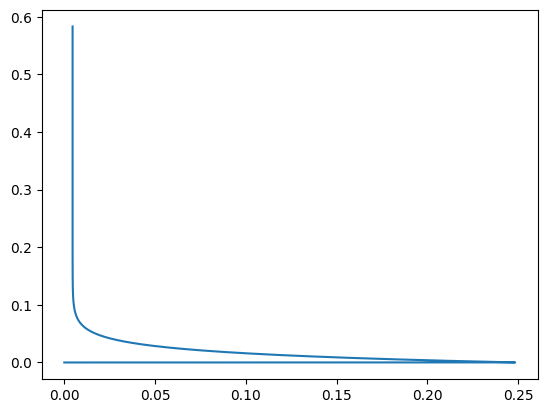

In [24]:
# Step response for the system
yout, T = ctrl.step_response(motor_ss_3)

plt.figure
plt.plot(T.T, yout.T)
plt.show(block=False)